# PK/PD AL Blood Volume and Hill Equation analyses
# Date: 07/30/2025

## 1. Studying how blood volume affects the hill equation

<br>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### a. Default PD model
#### ```patient_blood_volume = weight * 70 * 1000```

#### Instantaeneous hourly killing rate ```a```

$$
(\frac{-1}{24}) \times ln({1.0} - \frac{P_{max}\times(\frac{concentration}{bloodvolume})^n}{(\frac{concentration}{bloodvolume})^n + (\frac{EC_{50}}{bloodvolume}^n)})
$$

#### Overall kill r

In [2]:
# Generate a list of weights

weight_values = list(range(5, 101, 5)) 

print(weight_values)


[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]


In [35]:
#Calculate the blood volume for each weight
blood_volume_values = []
blood_volume_values = [weight * 70 for weight in weight_values]
print(blood_volume_values)

[350, 700, 1050, 1400, 1750, 2100, 2450, 2800, 3150, 3500, 3850, 4200, 4550, 4900, 5250, 5600, 5950, 6300, 6650, 7000]


In [77]:
artemether_max_dose = []
lower_limit = np.zeros(len(weight_values))
upper_limit = np.zeros(len(weight_values))
    
# Creating a range of artemether concentrations

for i in range(0, len(weight_values)):
    lower_limit[i] = 5 * weight_values[i] * 3 # mg/kg per day
    upper_limit[i] = 24 * weight_values[i] * 5
    artemether_max_dose.append(np.linspace(lower_limit[i], upper_limit[i], 100))

In [78]:
print(artemether_max_dose)

[array([ 75.        ,  80.3030303 ,  85.60606061,  90.90909091,
        96.21212121, 101.51515152, 106.81818182, 112.12121212,
       117.42424242, 122.72727273, 128.03030303, 133.33333333,
       138.63636364, 143.93939394, 149.24242424, 154.54545455,
       159.84848485, 165.15151515, 170.45454545, 175.75757576,
       181.06060606, 186.36363636, 191.66666667, 196.96969697,
       202.27272727, 207.57575758, 212.87878788, 218.18181818,
       223.48484848, 228.78787879, 234.09090909, 239.39393939,
       244.6969697 , 250.        , 255.3030303 , 260.60606061,
       265.90909091, 271.21212121, 276.51515152, 281.81818182,
       287.12121212, 292.42424242, 297.72727273, 303.03030303,
       308.33333333, 313.63636364, 318.93939394, 324.24242424,
       329.54545455, 334.84848485, 340.15151515, 345.45454545,
       350.75757576, 356.06060606, 361.36363636, 366.66666667,
       371.96969697, 377.27272727, 382.57575758, 387.87878788,
       393.18181818, 398.48484848, 403.78787879, 409.0

In [102]:
pmax = 0.99997
ec50_dose = 0.1
n = 1.5

In [83]:
artemether_max_concentrations = []
for i in range(0, len(blood_volume_values)):
    temp_conc = []
    for j in range(0, len(artemether_max_dose[i])): 
        temp_conc.append(artemether_max_dose[i][j] / np.array(blood_volume_values[i]))
    artemether_max_concentrations.append(temp_conc)


In [ ]:
ec50_concentrations = []
for i in range(0, len(weight_values)):
    ec50_concentrations.append(ec50_dose / np.array(blood_volume_values[i]))

20


In [101]:
def sigmoid_function(concentration, pmax, ec50, n):
    return (pmax * (concentration ** n)) / ((concentration ** n) + (ec50 ** n))

In [114]:

kill_fraction = []
killing_rates = []

for i in range(0, len(artemether_max_concentrations)):
    temp_kill_fraction = []
    temp_killing_rates = []
    for concentration in artemether_max_concentrations[i]:
        temp_kill_fraction.append(sigmoid_function(concentration, pmax, ec50_concentrations[i], n))
        temp_killing_rates.append((-1/24) * np.log(1.0 - temp_kill_fraction[-1]))
    kill_fraction.append(temp_kill_fraction)
    killing_rates.append(temp_killing_rates)


In [118]:
growth_rate = 0.048 
effect = [] 

for i in range(len(killing_rates)):
    effect.append(growth_rate - np.array(killing_rates[i]))

In [252]:
kill_percent = []
for i in range(len(kill_fraction)):
    temp_kill_percent = []
    for j in range(len(kill_fraction[i])):
        temp_kill_percent.append(kill_fraction[i][j] * 100)
    kill_percent.append(temp_kill_percent)

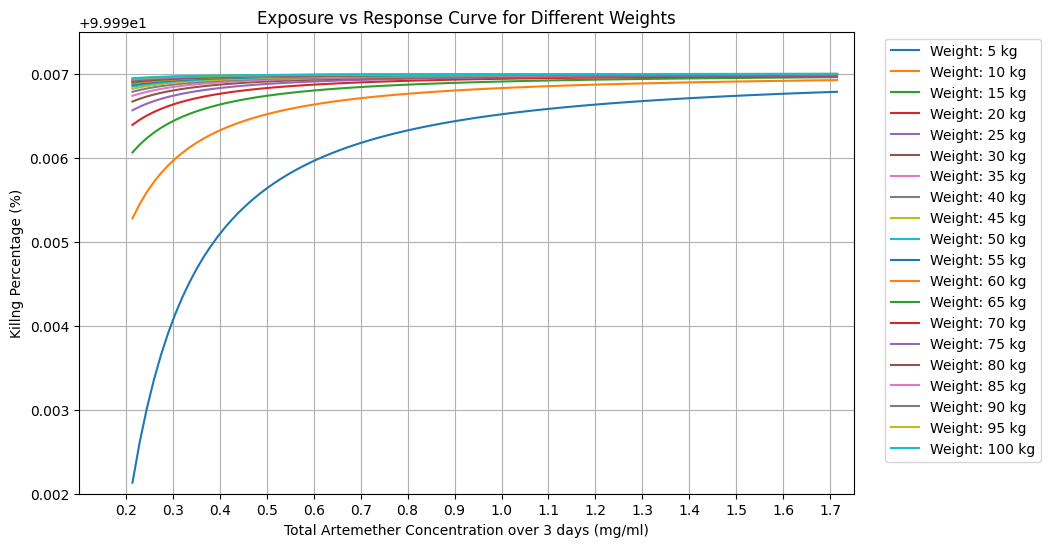

In [322]:
#Plot the exposure vs response curve for all weights
plt.figure(figsize=(10, 6))
for i in range(len(weight_values)):
    plt.plot(artemether_max_concentrations[i], kill_percent[i], label=f'Weight: {weight_values[i]} kg')
plt.xlim(0.1, 1.75)
plt.xticks(np.arange(0.2, 1.75, 0.1))
plt.ylim(99.992, 99.9975)
plt.yticks(np.arange(99.992, 99.9975, 0.001))
plt.xlabel('Total Artemether Concentration over 3 days (mg/ml)')
plt.ylabel('Killng Percentage (%)')
plt.title('Exposure vs Response Curve for Different Weights')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.grid()
plt.show()

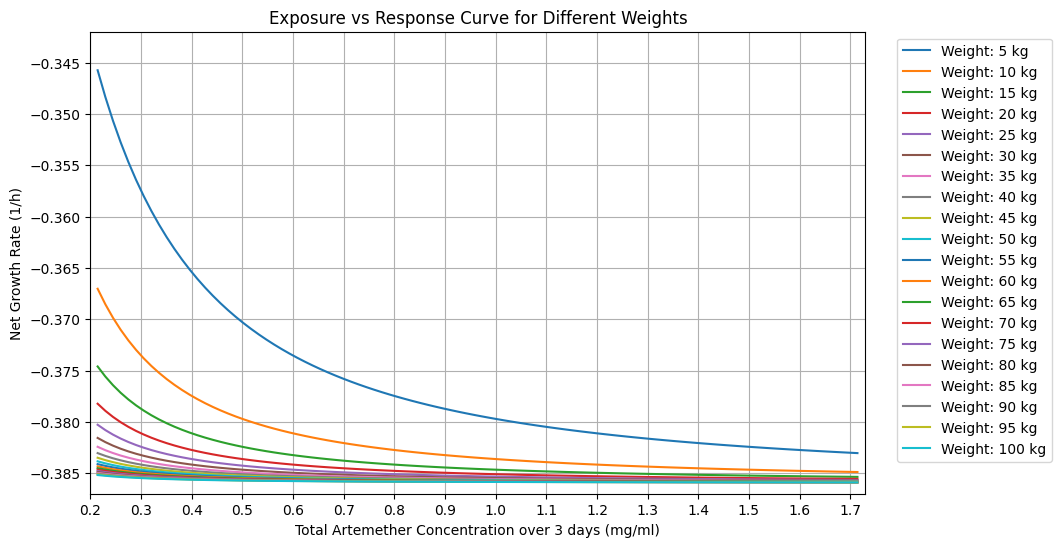

In [323]:
#Plot the exposure vs response curve for all weights
plt.figure(figsize=(10, 6))
for i in range(len(weight_values)):
    plt.plot(artemether_max_concentrations[i], effect[i], label=f'Weight: {weight_values[i]} kg')
plt.xlabel('Total Artemether Concentration over 3 days (mg/ml)')
plt.ylabel('Net Growth Rate (1/h)')
plt.xlim(0.2, 1.73)
plt.xticks(np.arange(0.2, 1.73, 0.1))
plt.ylim(-0.387, -0.342)
plt.yticks(np.arange(-0.385, -0.342, 0.005))
plt.title('Exposure vs Response Curve for Different Weights')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.grid()
plt.show()

<br>